### Figure 2: Distribution Plot

In [4]:
import numpy as np
from esda.moran import Moran,Moran_Local
from libpysal.weights import lat2W
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import properscoring as ps
import warnings
from scipy import stats
# from utils.evaluation import plot_histogram,calc_peak,calc_mean
from sklearn.metrics import mean_squared_error
from math import sqrt
import xesmf as xe
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

In [13]:
def plot_histogram(real,inputs, pred_cnn,pred_vaegan, pred_dsrnngan, binwidth,alpha,type='Mean'):
        """
        This function plots a histogram of the set in question
        """
        # ax = sns.histplot(data=penguins, x="flipper_length_mm", hue="species", element="step")
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.histplot(ax=ax,data=real, stat="density", fill=True,color='#b5a1e2',element='step',alpha=alpha)
        # sns.histplot(ax=ax,data=pred, stat="density", fill=True,color='#dc98a8',element='step',alpha=alpha)
        sns.histplot(ax=ax,data=inputs, stat="density", fill=True,color='Orange',element='step',alpha=alpha)
        sns.histplot(ax=ax,data=pred_cnn, stat="density", fill=True,color='Green',element='step',alpha=alpha)
        sns.histplot(ax=ax,data=pred_vaegan, stat="density", fill=True,color='Blue',element='step',alpha=alpha)
        sns.histplot(ax=ax,data=pred_dsrnngan, stat="density", fill=True,color='#dc98a8',element='step',alpha=alpha)
        ax.set_xlabel('Mean or Peak rainfall (mm/h)',size=18)
        ax.set_xlabel('%s Rainfall (mm/h)' % type,size=18)
        ax.set_ylabel('Density',size=18)
        plt.legend(labels=['real','input','cnn','vaegan','dsrnngan'],fontsize=24)
        plt.show()
        # plt.savefig('figs/histogram_accumulated_%s.png' % mode)

def calc_peak(array):
        nstorms,_,_ = array.shape
        peaks = np.zeros((nstorms))
        for i in range(nstorms):
                peaks[i] = np.nanmax(array[i])
        return peaks

def calc_mean(array):
        nstorms,_,_ = array.shape
        means = np.zeros((nstorms))
        for i in range(nstorms):
                means[i] = np.nanmean(array[i])
        return means

In [6]:

model = ''
# set mode
mode = 'validation'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)


# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]

pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/dsrnngan_predictions/validation_pred-opt.npy')[0][:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0][:,:,:,0]

pred_ensemble_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0]
pred_ensemble_gan = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]


# regrid inputs
grid_in = {"lon": np.linspace(0, 100, 10), "lat": np.linspace(0, 100, 10)}
grid_out = {"lon": np.linspace(0, 100, 100), "lat": np.linspace(0, 100, 100)}
regridder = xe.Regridder(grid_in, grid_out, "bilinear")
inputs_hr = regridder(inputs)

print(inputs_hr.shape)

(16253, 10, 10)
(16253, 100, 100)


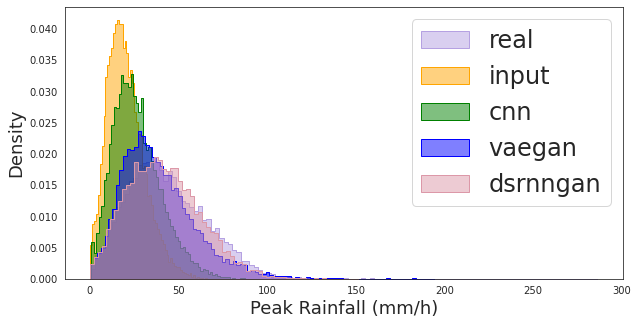

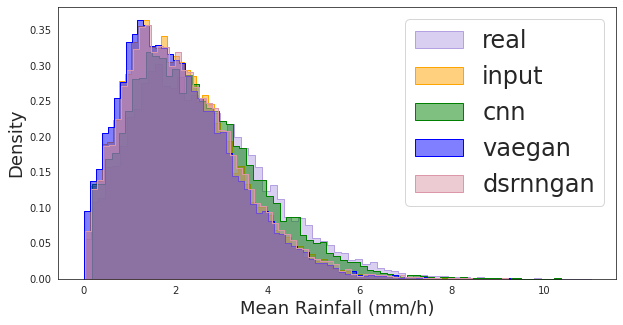

mean real:  2.5540338
mean pred:  2.4462242
std real:  5.023968
std pred:  3.9915657


In [15]:

pred = inputs_hr
def distribution(real,pred):
	peak_reals = calc_peak(real)
	peak_preds = calc_peak(pred_dsrnngan)
	peak_inputs = calc_peak(inputs)
	peak_vaegan = calc_peak(pred_vaegan)
	peak_cnn = calc_peak(pred_cnn)
	# plot_histogram(peak_reals,peak_preds,5,0.5,type = 'Peak')
	plot_histogram(peak_reals,peak_inputs,peak_cnn,peak_vaegan,peak_preds,5,0.5,type = 'Peak')
	# real,inputs, pred_cnn,pred_vaegan, pred_dsrnngan,
	# ks = stats.kstest(peak_reals, peak_preds)
	# print(ks)
	# ks = stats.ks_2samp(peak_reals, peak_preds)
	# print(ks)

	mean_reals = calc_mean(real)
	mean_preds = calc_mean(pred_dsrnngan)
	mean_inputs = calc_mean(inputs)
	mean_vaegan = calc_mean(pred_vaegan)
	mean_cnn = calc_mean(pred_cnn)
	# plot_histogram(mean_reals,mean_preds,5,0.5)
	plot_histogram(mean_reals,mean_inputs,mean_cnn,mean_vaegan,mean_preds,5,0.5)
	# ks = stats.kstest(mean_reals, mean_preds)
	# print(ks)
	# ks = stats.kstest(mean_preds,mean_preds)
	# print(ks)


	print('mean real: ',np.mean(real))
	print('mean pred: ', np.mean(pred))
	print('std real: ',np.std(real))
	print('std pred: ',np.std(pred))

distribution(real,pred)